In [5]:
import csv
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression # simplest classifier
from sklearn.tree import DecisionTreeClassifier # weak learner
from sklearn.svm import LinearSVC # subvector machine
from sklearn.neural_network import MLPClassifier # neural network
from sklearn.linear_model import SGDClassifier # indicated when sample > 100K
from sklearn.ensemble import RandomForestClassifier # tree ensemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [6]:
df_test = pd.read_csv("SelectedTestData.csv")
df_train = pd.read_csv("SelectedTrainData.csv")

In [7]:
df_test =df_test.drop('Unnamed: 0',axis=1)
df_train=df_train.drop('Unnamed: 0',axis=1)


In [8]:
df_train.shape
df_test.shape

(39411, 11)

(3944, 11)

In [9]:
X_train= df_train.drop(['result'], axis=1)
y_train= df_train['result']
X_test= df_test.drop(['result'], axis=1)
y_test= df_test['result']

In [10]:
def qualificate(classifiers):
    from sklearn.model_selection import cross_val_score
    import time as time
    for clf in classifiers:
        t0 = time.time()
        score = cross_val_score(clf, X_train, y_train)
        print ("%30s - AS:%.3f - t:%.3f" % (clf.__class__.__name__, score.mean(), time.time() - t0))


estimators = [LinearDiscriminantAnalysis(),AdaBoostClassifier(),LogisticRegression(), SVC(),DecisionTreeClassifier(), LinearSVC(), MLPClassifier(),
                SGDClassifier(), RandomForestClassifier(),GradientBoostingClassifier(),GaussianNB(),KNeighborsClassifier(),XGBClassifier()]

qualificate(estimators)

    LinearDiscriminantAnalysis - AS:0.671 - t:0.991
            AdaBoostClassifier - AS:0.434 - t:2.243
            LogisticRegression - AS:0.669 - t:0.744
                           SVC - AS:0.546 - t:91.415
        DecisionTreeClassifier - AS:0.364 - t:0.203
                     LinearSVC - AS:0.670 - t:10.984
                 MLPClassifier - AS:0.669 - t:2.146
                 SGDClassifier - AS:0.372 - t:0.078


C:\Users\gaurang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\gaurang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\gaurang\Anaconda3\l

        RandomForestClassifier - AS:0.365 - t:0.538
    GradientBoostingClassifier - AS:0.415 - t:3.026
                    GaussianNB - AS:0.636 - t:0.082
          KNeighborsClassifier - AS:0.485 - t:1.511


C:\Users\gaurang\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\gaurang\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


                 XGBClassifier - AS:0.393 - t:1.611


C:\Users\gaurang\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Logistic Regression

In [11]:
logistic=LogisticRegression()

logistic.fit(X_train,y_train)

predict_test = logistic.predict(X_test)
accuracy_score(y_test,predict_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.8983265720081136

Accuracy Score: 0.898
Presion Score: 0.699


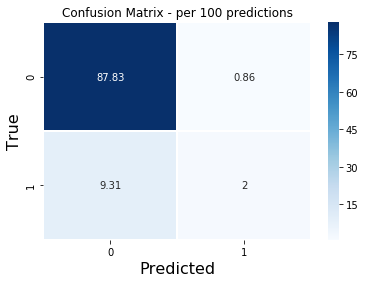

In [12]:
def results(predict_test, y_test):
    from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
    print ("Accuracy Score: %.3f" % accuracy_score(y_test, predict_test))
    print ("Presion Score: %.3f" % precision_score(y_test, predict_test))

    cm = confusion_matrix(y_test, predict_test)
    df_cm = pd.DataFrame(100*cm/float(cm.sum()))
    ax = sns.heatmap(df_cm.round(2), annot=True, cmap='Blues', fmt='g', linewidths=1)
    ax.set_title("Confusion Matrix - per 100 predictions")
    ax.set_xlabel('Predicted', fontsize=16)
    ax.set_ylabel('True', fontsize=16, rotation=90)
    plt.show()

results(logistic.predict(X_test), y_test)

In [13]:
print(classification_report(y_test,predict_test))

             precision    recall  f1-score   support

          0       0.90      0.99      0.95      3498
          1       0.70      0.18      0.28       446

avg / total       0.88      0.90      0.87      3944



### SGDCClassifier

C:\Users\gaurang\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

C:\Users\gaurang\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy Score: 0.887
Presion Score: 0.000


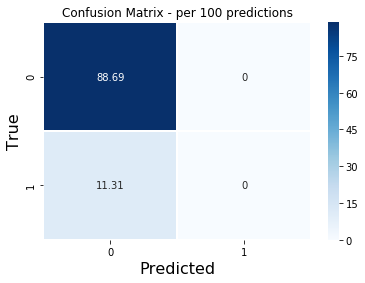

In [14]:
sgdc = SGDClassifier()

sgdc.fit(X_train,y_train)

predict_sgdc = sgdc.predict(X_test)
results(sgdc.predict(X_test), y_test)

In [15]:
print(classification_report(y_test,predict_sgdc))

             precision    recall  f1-score   support

          0       0.89      1.00      0.94      3498
          1       0.00      0.00      0.00       446

avg / total       0.79      0.89      0.83      3944



C:\Users\gaurang\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### MLPClassier

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Accuracy Score: 0.894
Presion Score: 0.638


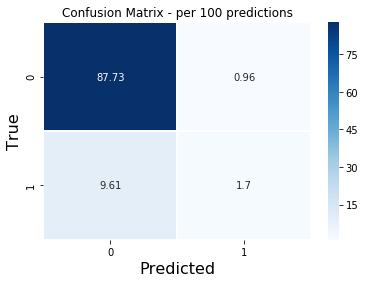

In [16]:
mlp = MLPClassifier()

mlp.fit(X_train,y_train)
predict_mlp= mlp.predict(X_test)
results(mlp.predict(X_test), y_test)

In [17]:
print(classification_report(y_test,predict_mlp))

             precision    recall  f1-score   support

          0       0.90      0.99      0.94      3498
          1       0.64      0.15      0.24       446

avg / total       0.87      0.89      0.86      3944



## Conclusion:

Below are the cross validation scores obtained by 13 classifiers :

|**Classifier**|**Validation Score**|**Time taken to run**|
|--------------|--------------------|---------------------|
|      LDA     |        0.505       |         0.599       |
|   Ada Boost  |        0.437       |         2.853       |
|**Logistic**  |      **0.669**     |         0.625       |            
|      SVC     |        0.495       |         142.549     |
|Decision Tree |        0.371       |         0.452       |
| Linear SVC   |        0.67        |         11.242      |
|   ** MLP**   |      **0.669**     |         3.715       |
|   **SGDC**   |      **0.894**     |         0.297       |
|Random Forest |        0.379       |         0.746       |
|Gradient Boost|        0.433       |         7.334       |
| Gaussian NB  |        0.636       |         0.253       |
| KNeighbors   |        0.50        |         5.186       |
|     XGB      |        0.397       |        10.729       |


Hence we are selecting 3 best models with classification accuracy score after training the model with test data:

* SGDC Classifier    : **0.887**
* MLP Classifier     : **0.894**
* LogisticRegression : **0.898**